# Table of contents

5. [Exploratory Data Analysis](#EDA)
    1. [General EDA](#GenEDA)
    2. [Feature EDA](#FeatEDA)

# 5) Exploratory Data Analysis<a name="EDA"></a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

### General EDA<a name="GenEDA"></a>

In [2]:
## Importing data
train = pd.read_csv('../datasets/exports/train_clean.csv')
test = pd.read_csv('../datasets/exports/test_clean.csv')

In [3]:
## Perusing columns and data
train.head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice,HouseAge,TotalArea,QualMetric,TotalBaths,PorchArea,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_NAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,MSSubClass_30,MSSubClass_50,MSSubClass_60,mansion,SalePriceLog
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4.0,3,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5.0,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4.0,6,Typ,0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500,43,1795.768077,12.454091,2.5,44,0,0,0,0,0,0,0,0,0,0,1,0,11.779129
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4.0,3,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5.0,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4.0,8,Typ,1,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000,23,2416.824091,13.932605,3.5,74,0,0,0,0,0,0,0,0,0,0,1,0,12.301383
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,4,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3.0,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4.0,5,Typ,0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000,66,1561.509311,10.941738,2.0,52,0,0,1,0,0,0,0,0,0,0,0,0,11.599103
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,3,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4.0,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3.0,7,Typ,0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000,13,1508.138072,10.927709,2.5,100,0,0,0,0,0,0,0,0,0,0,1,0,12.066811
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3.0,3,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3.0,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3.0,6,Typ,0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,N,0,59,0,0,0,0,0,3,2010,WD,138500,119,1747.103890,10.371302,2.0,59,0,0,0,0,0,0,0,0,0,1,0,0,11.838626


In [4]:
## Learning about the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 94 columns):
Id                      2051 non-null int64
PID                     2051 non-null int64
MSSubClass              2051 non-null int64
MSZoning                2051 non-null object
LotFrontage             1721 non-null float64
LotArea                 2051 non-null int64
Street                  2051 non-null object
LotShape                2051 non-null object
LandContour             2051 non-null object
Utilities               2051 non-null object
LotConfig               2051 non-null object
LandSlope               2051 non-null object
Neighborhood            2051 non-null object
Condition1              2051 non-null object
Condition2              2051 non-null object
BldgType                2051 non-null object
HouseStyle              2051 non-null object
OverallQual             2051 non-null int64
OverallCond             2051 non-null int64
YearBuilt               2051 non-null int64

In [5]:
## Identifying the percent of data missing from coumns missing more than 0% of data
train[list(train.columns[train.isna().any()])].isna().sum()/2051

LotFrontage     0.160897
MasVnrType      0.010726
MasVnrArea      0.010726
BsmtQual        0.026816
BsmtCond        0.026816
BsmtExposure    0.028279
BsmtFinType1    0.026816
BsmtFinSF1      0.000488
BsmtFinType2    0.027304
BsmtFinSF2      0.000488
BsmtUnfSF       0.000488
TotalBsmtSF     0.000488
BsmtFullBath    0.000975
BsmtHalfBath    0.000975
GarageType      0.055095
GarageYrBlt     0.055583
GarageFinish    0.055583
GarageCars      0.000488
GarageArea      0.000488
GarageQual      0.055583
GarageCond      0.055583
TotalArea       0.000975
QualMetric      0.026816
TotalBaths      0.000975
dtype: float64

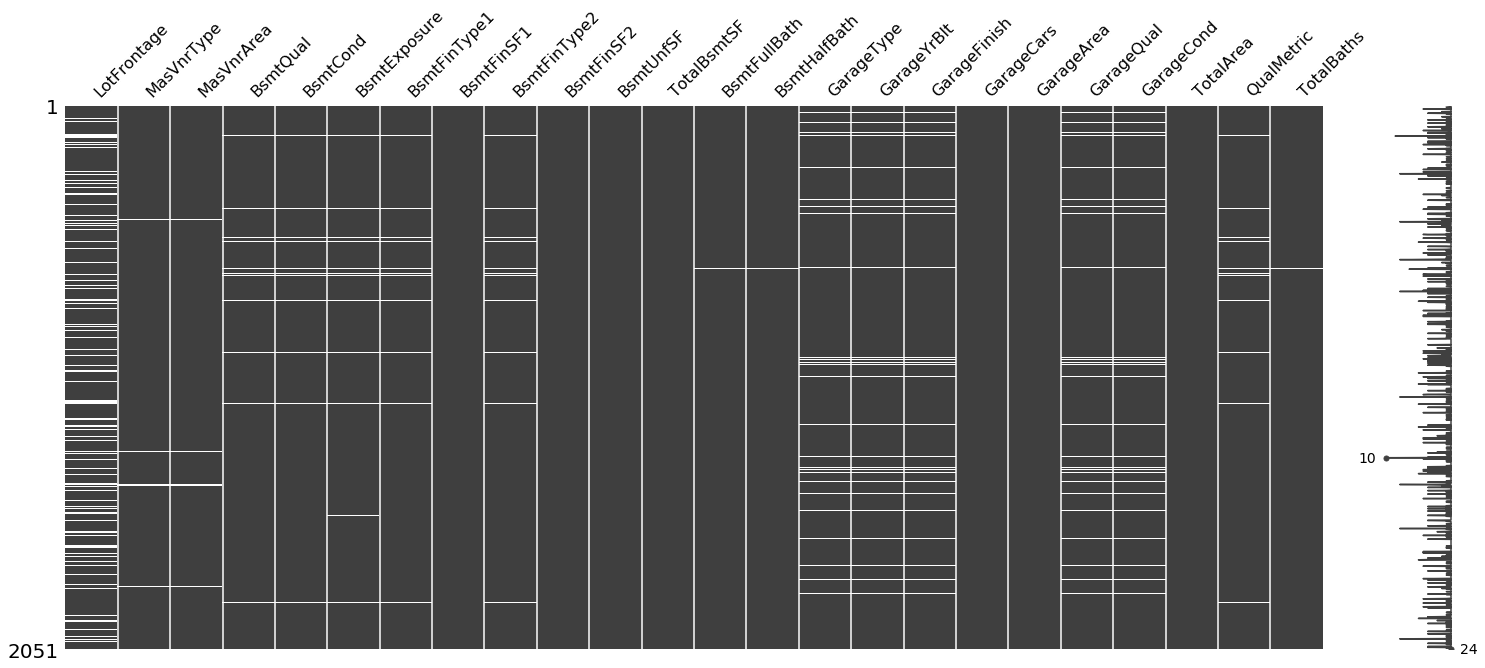

In [6]:
## Visual representation of where missing data is
msno.matrix(train[train.columns[train.isna().any()].tolist()]);

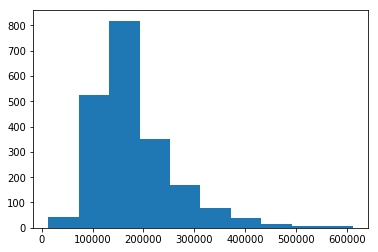

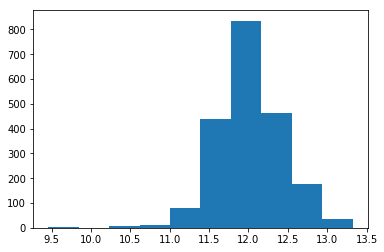

In [7]:
## Examining the skew of target SalePrice
plt.hist(train['SalePrice']);
plt.show()

## Since it looks like there is a skew, below examines the log to see if that normalizes the target
plt.hist(train['SalePriceLog']);

#### Log(sale price) has a more normal distribution so I will use that as the target
#### NOTE: Exponent will be taken later

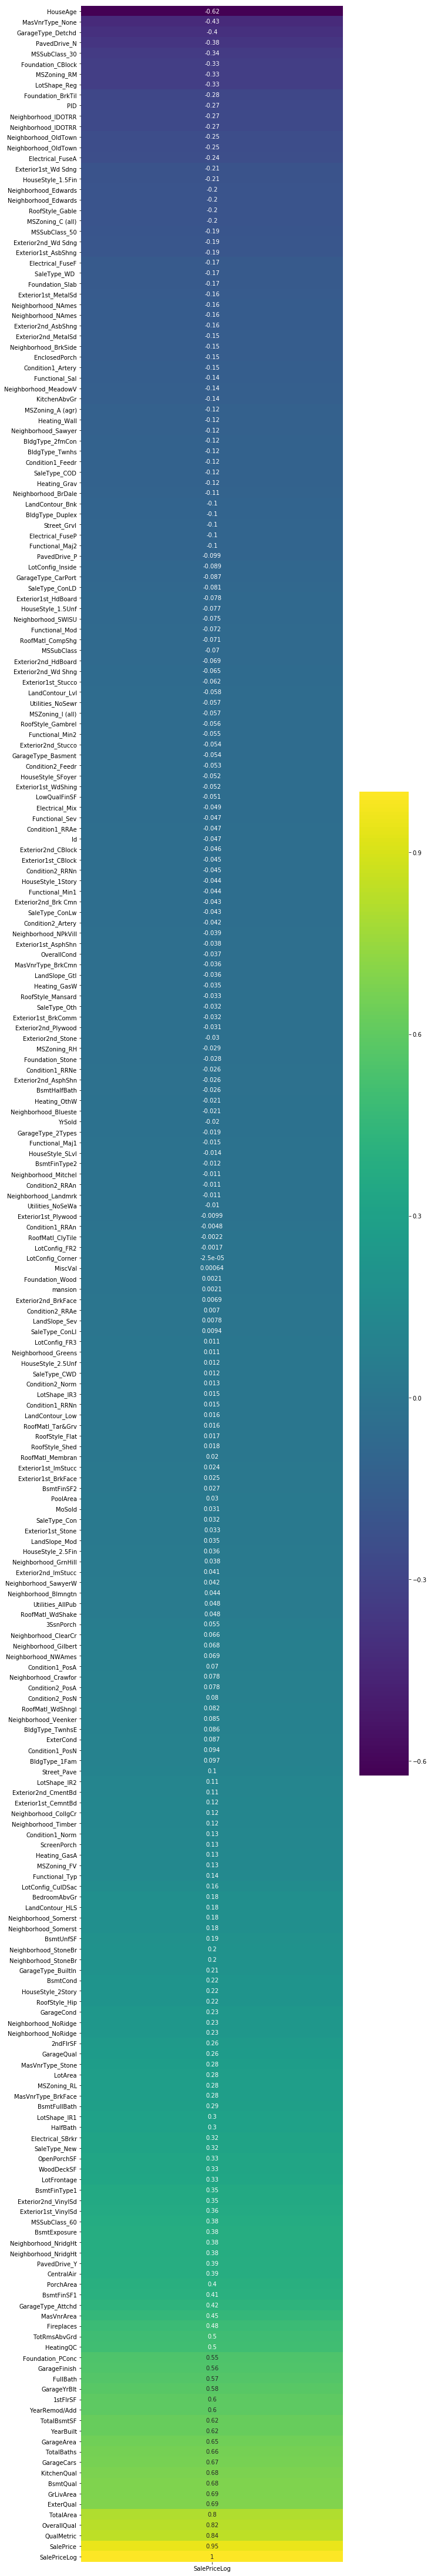

In [8]:
## Heatmap to get a look at ALL possible correlations or features
plt.figure(figsize=(10,80))
sns.heatmap(pd.get_dummies(train).corr()[['SalePriceLog']].sort_values('SalePriceLog'),
            cmap='viridis', annot=True);                                 

### Feature EDA<a name="FeatEDA"></a>

In [9]:
### Function to create multiple scatter plots in one figure plot
#### CODE BORROWED: Project 1
def subplot_scatters(dataframe, list_of_x_cols, list_of_y_cols, list_of_x_labels, list_of_y_labels, list_of_titles):
    nrows = int(np.ceil(len(list_of_x_cols)/2)) # Number of rows needed
    fig, ax = plt.subplots(nrows=nrows, ncols=2, 
                           figsize=(16,round((len(list_of_x_cols)+len(list_of_x_cols)%2)*2))) # Nice flex spacing
    ax = ax.ravel() # Makes it easier to iterate
    plt.subplots_adjust(hspace = .4) # Nice padding
    for i, column in enumerate(list_of_x_cols): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column], dataframe[list_of_y_cols[i]]) # Calls on (x, y) inputs
        ax[i].set_title(list_of_titles[i]) # Set title
        ax[i].set_xlabel(list_of_x_labels[i]) # Set x-axis label
        ax[i].set_ylabel(list_of_y_labels[i]) # Set y-axis label

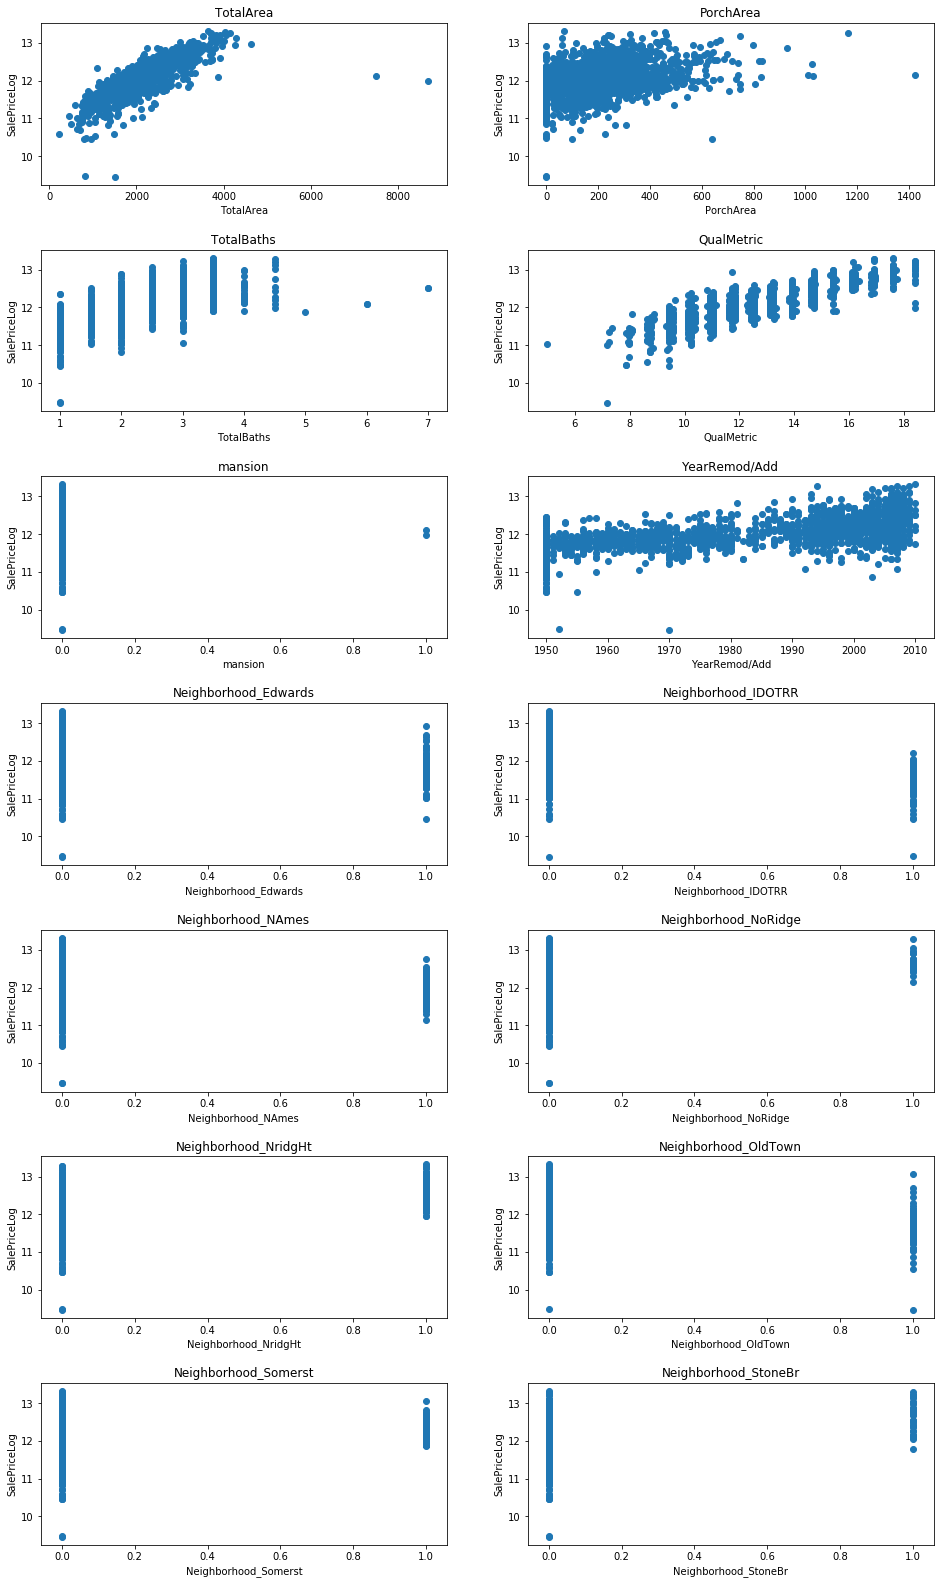

In [10]:
## Plotting all the included variables against the SalePriceLog
subplot_scatters(train,
                ['TotalArea','PorchArea','TotalBaths','QualMetric','mansion','YearRemod/Add',
                'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes',
               'Neighborhood_NoRidge', 'Neighborhood_NridgHt','Neighborhood_OldTown',
                 'Neighborhood_Somerst', 'Neighborhood_StoneBr'],
                
                ['SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog',
                'SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog',
                'SalePriceLog','SalePriceLog'],
                
                ['TotalArea','PorchArea','TotalBaths','QualMetric','mansion','YearRemod/Add',
                'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes',
               'Neighborhood_NoRidge', 'Neighborhood_NridgHt','Neighborhood_OldTown',
                 'Neighborhood_Somerst', 'Neighborhood_StoneBr'],
                
                ['SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog',
                'SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog','SalePriceLog',
                'SalePriceLog','SalePriceLog'],
                
                ['TotalArea','PorchArea','TotalBaths','QualMetric','mansion','YearRemod/Add',
                'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes',
               'Neighborhood_NoRidge', 'Neighborhood_NridgHt','Neighborhood_OldTown',
                 'Neighborhood_Somerst', 'Neighborhood_StoneBr'])

In [11]:
## Looking for colinearity and correlation to target from features around AREA or SIZE
train[['TotalBsmtSF','GrLivArea','GarageArea','1stFlrSF',
       '2ndFlrSF','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','SalePriceLog']].corr()

,TotalBsmtSF,GrLivArea,GarageArea,1stFlrSF,2ndFlrSF,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,SalePriceLog
TotalBsmtSF,1.000000,0.453635,0.488805,0.808756,-0.217351,0.086545,0.419238,-0.022449,0.621416
GrLivArea,0.453635,1.000000,0.490949,0.562441,0.639092,0.001083,0.234618,0.106266,0.687774
GarageArea,0.488805,0.490949,1.000000,0.498712,0.121286,0.013190,0.145080,-0.071190,0.650755
1stFlrSF,0.808756,0.562441,0.498712,1.000000,-0.268855,0.095675,0.302299,-0.010399,0.599086
2ndFlrSF,-0.217351,0.639092,0.121286,-0.268855,1.000000,-0.087505,-0.012928,0.014645,0.256771
BsmtFinSF2,0.086545,0.001083,0.013190,0.095675,-0.087505,1.000000,-0.231330,-0.002764,0.026541
BsmtUnfSF,0.419238,0.234618,0.145080,0.302299,-0.012928,-0.231330,1.000000,0.059575,0.193935
LowQualFinSF,-0.022449,0.106266,-0.071190,-0.010399,0.014645,-0.002764,0.059575,1.000000,-0.051124
SalePriceLog,0.621416,0.687774,0.650755,0.599086,0.256771,0.026541,0.193935,-0.051124,1.000000


In [12]:
## Looking for colinearity and correlation to target from features around QUALITY
train[['OverallQual','KitchenQual','BsmtQual','GarageQual','ExterQual','GarageCond','SalePriceLog']].corr()

,OverallQual,KitchenQual,BsmtQual,GarageQual,ExterQual,GarageCond,SalePriceLog
OverallQual,1.000000,0.690639,0.680455,0.208853,0.740257,0.173415,0.822774
KitchenQual,0.690639,1.000000,0.594840,0.133284,0.730562,0.107243,0.681550
BsmtQual,0.680455,0.594840,1.000000,0.163286,0.661594,0.139641,0.683721
GarageQual,0.208853,0.133284,0.163286,1.000000,0.152579,0.516401,0.259619
ExterQual,0.740257,0.730562,0.661594,0.152579,1.000000,0.099125,0.690333
GarageCond,0.173415,0.107243,0.139641,0.516401,0.099125,1.000000,0.232281
SalePriceLog,0.822774,0.681550,0.683721,0.259619,0.690333,0.232281,1.000000


In [13]:
## Looking for colinearity and correlation to target from features around BATHROOMS
train[['BsmtFullBath','FullBath','HalfBath','BsmtHalfBath','SalePriceLog']].corr()

#### NOTE: The negative correlation on BsmtHalfBath was concerning, but in the end that may be confounding
#### variables. The TotalBath-SalePrice correlation seemed to be stronger when BsmtHalfBath was included.

,BsmtFullBath,FullBath,HalfBath,BsmtHalfBath,SalePriceLog
BsmtFullBath,1.000000,-0.010790,-0.025954,-0.146894,0.286193
FullBath,-0.010790,1.000000,0.153656,-0.060099,0.565855
HalfBath,-0.025954,0.153656,1.000000,-0.047309,0.300542
BsmtHalfBath,-0.146894,-0.060099,-0.047309,1.000000,-0.026018
SalePriceLog,0.286193,0.565855,0.300542,-0.026018,1.000000


In [14]:
## Looking for colinearity and correlation to target from features around OUTDOOR PORCH/DECK
train[['PorchArea','ScreenPorch','3SsnPorch','OpenPorchSF','EnclosedPorch','WoodDeckSF','SalePriceLog']].corr()

#### NOTE: The negative correlation on EnclosedPorch was concerning, but in the end that may be confounding
#### variables. The PorchArea-SalePrice correlation seemed to be stronger when BsmtHalfBath was included.

,PorchArea,ScreenPorch,3SsnPorch,OpenPorchSF,EnclosedPorch,WoodDeckSF,SalePriceLog
PorchArea,1.000000,0.298058,0.123189,0.446315,0.220258,0.754074,0.399929
ScreenPorch,0.298058,1.000000,-0.029574,0.059027,-0.069049,-0.067770,0.125983
3SsnPorch,0.123189,-0.029574,1.000000,-0.007336,-0.032145,-0.010851,0.054918
OpenPorchSF,0.446315,0.059027,-0.007336,1.000000,-0.077019,0.047630,0.328268
EnclosedPorch,0.220258,-0.069049,-0.032145,-0.077019,1.000000,-0.114079,-0.149210
WoodDeckSF,0.754074,-0.067770,-0.010851,0.047630,-0.114079,1.000000,0.330145
SalePriceLog,0.399929,0.125983,0.054918,0.328268,-0.149210,0.330145,1.000000


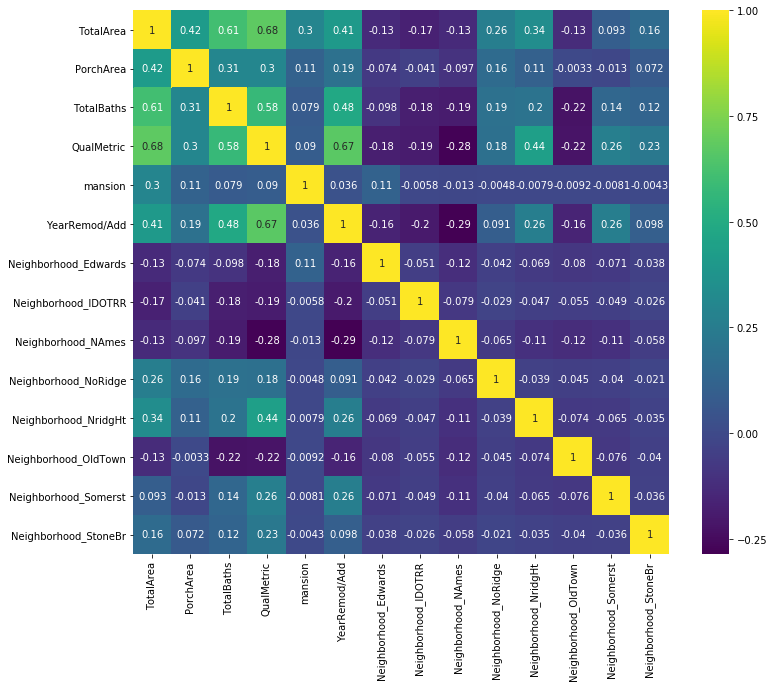

In [15]:
## Checking out correlations on all key features
plt.figure(figsize=(12,10))
sns.heatmap(train[['TotalArea','PorchArea','TotalBaths','QualMetric','mansion','YearRemod/Add',
                'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes',
               'Neighborhood_NoRidge', 'Neighborhood_NridgHt','Neighborhood_OldTown',
                 'Neighborhood_Somerst', 'Neighborhood_StoneBr']].corr(),
            annot=True,
           cmap='viridis');

#### Some metrics are fairly correlated, but I'm not overly worried about colinearity
#### QualMetric-TotalArea (0.68) is somewhat concerning but these are fundamental features
#### QualMetric-YearRemod/Add (0.67) concerns me more – since YearRemod/Add doesn't 
#### add too much value